# Prática 3 - Clusterização
## Caio Martim Barros - 472713


Nesta tarefa bonus, voce deve  implementar nossa versão do K-Means alá scikit-learn! :D

Pra voce deverá implementar as funções do algoritmo KMeans passo-a-passo:

- Inicialização dos centróides

- Definição dos clusters

- Distância euclidiana

- Encontrar centróide mais próximo

- Métrica de avaliação (Inértia)

- Atualização dos centroids


# K-MEANS

Organizar dados em agrupamentos é um dos modos fundamentais de compreensão e aprendizado. Como por exemplo, os organismos em um sistema biológico são classificados em domínio, reino, filo, classe, etc. 

A **Clusterização** é o agrupamento em conjuntos de dados, utilizando similaridades baseadas nas características. Em machine learning temos vários algoritmos de clusterização, um deles é o **K-Means**.

**K-Means** é um algoritmo iterativo de clustering que visa encontrar o máximo local em cada iteração.

---

# Objetivo

Nesse notebook iremos implementar nossa versão do K-Means alá scikit-learn! :D

Pra isso vamos:

- Implementar as funções do algoritmo KMeans passo-a-passo
> - Inicialização dos centróides
> - Definição dos clusters
> - Distância euclidiana
> - Encontrar centróide mais próximo 
> - Métrica de avaliação (Inértia)
> - Atualização dos centroids

# 0. Carregando os dados de teste

Carregue os dados disponibilizados, e identifique visualmente em quantos grupos os dados parecem estar distribuídos.

In [1]:
%load_ext lab_black

import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from math import sqrt

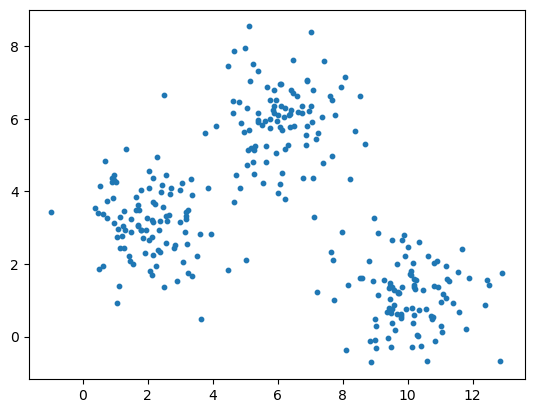

In [2]:
# load the data with pandas
dataset = pd.read_csv("data.csv", header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:, 0], dataset[:, 1], s=10)
plt.show()

# 1. Implementar o algoritmo K-means

Nesta etapa você irá implementar as funções que compõe o algoritmo do KMeans uma a uma. É importante entender e ler a documentação de cada função, principalmente as dimensões dos dados esperados na saída.

## 1.1 Inicializar os centróides

A primeira etapa do algoritmo consiste em inicializar os centróides de maneira aleatória. Essa etapa é uma das mais importantes do algoritmo e uma boa inicialização pode diminuir bastante o tempo de convergência.

Para inicializar os centróides você pode considerar o conhecimento prévio sobre os dados, mesmo sem saber a quantidade de grupos ou sua distribuição. 

> **Dica**: Verifique os minimos e máximos do dataset e depois realize um random nesse intervalo. Você pode utilizar as funções do numpy de min e max, além da 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html 

In [3]:
def calculate_initial_centers(dataset, k):
    """
    Inicializa os centróides iniciais de maneira arbitrária

    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    k -- Número de centróides desejados

    Retornos:
    centroids -- Lista com os centróides calculados - [k,n]
    """

    #### CODE HERE ####

    min_values = np.min(dataset, axis=0)
    max_values = np.max(dataset, axis=0)
    centroids = np.random.uniform(min_values, max_values, size=(k, dataset.shape[1]))

    ### END OF CODE ###

    return centroids

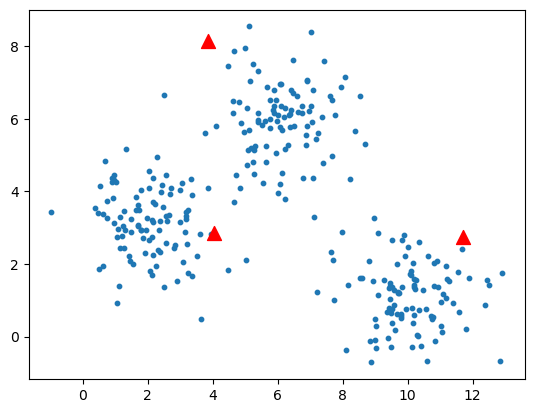

In [4]:
k = 3
centroids = calculate_initial_centers(dataset, k)

plt.scatter(dataset[:, 0], dataset[:, 1], s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", c="red", s=100)
plt.show()

Teste a função criada e visualize os centróides que foram calculados.

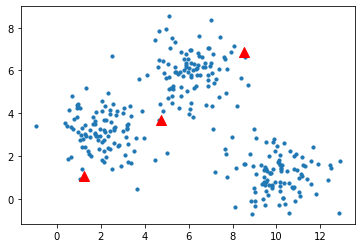

In [ ]:
k = 3
centroids = calculate_initial_centers(dataset, k)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red',s=100)
plt.show()

## 1.2 Definir os clusters

Na segunda etapa do algoritmo serão definidos o grupo de cada dado, de acordo com os centróides calculados.

### 1.2.1 Função de distância 

Codifique a função de distância euclidiana entre dois pontos __(a, b)__.

Definido pela equação:

$$ dist(a, b) = \sqrt{(a_1-b_1)^{2}+(a_2-b_2)^{2}+ ... + (a_n-b_n)^{2}} $$

$$ dist(a, b) = \sqrt{\sum_{i=1}^{n}(a_i-b_i)^{2}} $$

In [5]:
def euclidean_distance(a, b):
    """
    Calcula a distância euclidiana entre os pontos a e b

    Argumentos:
    a -- Um ponto no espaço - [1,n]
    b -- Um ponto no espaço - [1,n]

    Retornos:
    distance -- Distância euclidiana entre os pontos
    """

    #### CODE HERE ####

    distance = np.linalg.norm(a - b)

    ### END OF CODE ###

    return distance

In [6]:
a = np.array([1, 5, 9])
b = np.array([3, 7, 8])

if euclidean_distance(a, b) == 3:
    print("Distância calculada corretamente!")
else:
    print("Função de distância incorreta")

Distância calculada corretamente!


Teste a função criada.

In [ ]:
a = np.array([1, 5, 9])
b = np.array([3, 7, 8])

if (euclidean_distance(a,b) == 3):
    print("Distância calculada corretamente!")
else:
    print("Função de distância incorreta")

Distância calculada corretamente!


### 1.2.2 Calcular o centroide mais próximo

Utilizando a função de distância codificada anteriormente, complete a função abaixo para calcular o centroid mais próximo de um ponto qualquer. 

In [7]:
def nearest_centroid(a, centroids):
    """
    Calcula o índice do centroid mais próximo ao ponto a

    Argumentos:
    a -- Um ponto no espaço - [1,n]
    centroids -- Lista com os centróides - [k,n]

    Retornos:
    nearest_index -- Índice do centróide mais próximo
    """

    #### CODE HERE ####

    distances = np.linalg.norm(a - centroids, axis=1)
    nearest_index = np.argmin(distances)

    ### END OF CODE ###

    return nearest_index

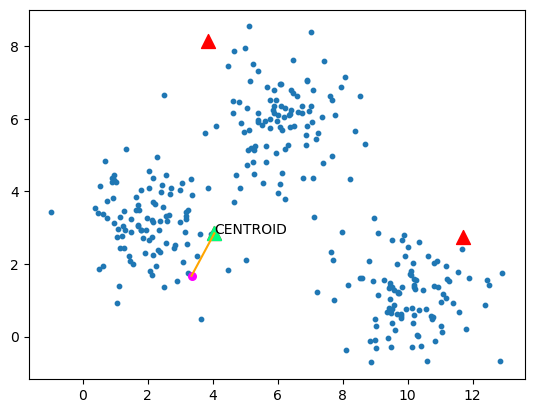

In [8]:
# Seleciona um ponto aleatório no dataset
index = np.random.randint(dataset.shape[0])
a = dataset[index, :]

# Usa a função para descobrir o centroid mais próximo
idx_nearest_centroid = nearest_centroid(a, centroids)


# Plota os dados ------------------------------------------------
plt.scatter(dataset[:, 0], dataset[:, 1], s=10)
# Plota o ponto aleatório escolhido em uma cor diferente
plt.scatter(a[0], a[1], c="magenta", s=30)

# Plota os centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", c="red", s=100)
# Plota o centroid mais próximo com uma cor diferente
plt.scatter(
    centroids[idx_nearest_centroid, 0],
    centroids[idx_nearest_centroid, 1],
    marker="^",
    c="springgreen",
    s=100,
)

# Cria uma linha do ponto escolhido para o centroid selecionado
plt.plot(
    [a[0], centroids[idx_nearest_centroid, 0]],
    [a[1], centroids[idx_nearest_centroid, 1]],
    c="orange",
)
plt.annotate(
    "CENTROID",
    (
        centroids[idx_nearest_centroid, 0],
        centroids[idx_nearest_centroid, 1],
    ),
)
plt.show()

Teste a função criada

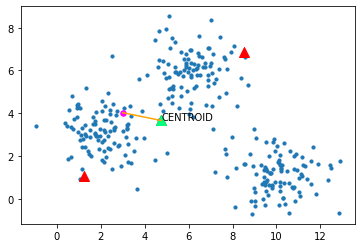

In [ ]:
# Seleciona um ponto aleatório no dataset
index = np.random.randint(dataset.shape[0])
a = dataset[index,:]

# Usa a função para descobrir o centroid mais próximo
idx_nearest_centroid = nearest_centroid(a, centroids)


# Plota os dados ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], s=10)
# Plota o ponto aleatório escolhido em uma cor diferente
plt.scatter(a[0], a[1], c='magenta', s=30)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
# Plota o centroid mais próximo com uma cor diferente
plt.scatter(centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],
            marker='^', c='springgreen', s=100)

# Cria uma linha do ponto escolhido para o centroid selecionado
plt.plot([a[0], centroids[idx_nearest_centroid,0]], 
         [a[1], centroids[idx_nearest_centroid,1]],c='orange')
plt.annotate('CENTROID', (centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],))
plt.show()

### 1.2.3 Calcular centroid mais próximo de cada dado do dataset

Utilizando a função anterior que retorna o índice do centroid mais próximo, calcule o centroid mais próximo de cada dado do dataset. 

In [9]:
def all_nearest_centroids(dataset, centroids):
    """
    Calcula o índice do centroid mais próximo para cada
    ponto do dataset

    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]

    Retornos:
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    """

    #### CODE HERE ####
    distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=2)
    nearest_indexes = np.argmin(distances, axis=1)
    ### END OF CODE ###

    return nearest_indexes

In [10]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

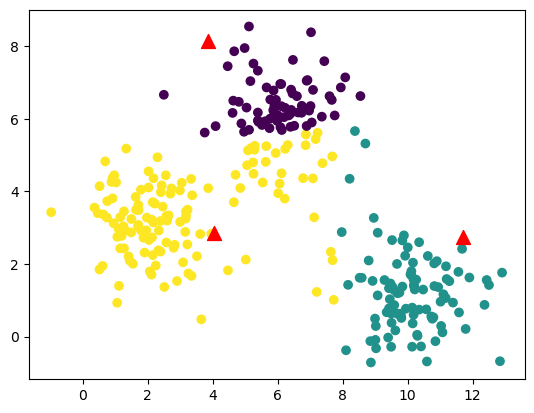

In [11]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=nearest_indexes)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", c="red", s=100)
plt.show()

Teste a função criada visualizando os cluster formados.

In [ ]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

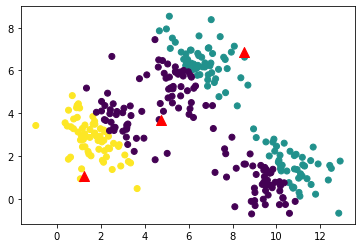

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
plt.show()

## 1.3 Métrica de avaliação 

Após formar os clusters, como sabemos se o resultado gerado é bom? Para isso, precisamos definir uma métrica de avaliação.

O algoritmo K-means tem como objetivo escolher centróides que minimizem a soma quadrática das distância entre os dados de um cluster e seu centróide. Essa métrica é conhecida como __inertia__.

$$\sum_{i=0}^{n}\min_{c_j \in C}(||x_i - c_j||^2)$$

A __inertia__, ou o critério de soma dos quadrados dentro do cluster, pode ser reconhecido como uma medida de o quão internamente coerentes são os clusters, porém ela sofre de alguns inconvenientes:

- A inertia não é uma métrica normalizada: sabemos apenas que valores mais baixos são melhores e zero é o valor ótimo. Mas em espaços de dimensões muito altas, as distâncias euclidianas tendem a se tornar infladas (este é um exemplo da chamada “maldição da dimensionalidade”). A execução de um algoritmo de redução de dimensionalidade, como o PCA, pode aliviar esse problema e acelerar os cálculos.

Fonte: https://scikit-learn.org/stable/modules/clustering.html

Para podermos avaliar os nosso clusters, codifique a métrica da inertia abaixo, para isso você pode utilizar a função de distância euclidiana construída anteriormente.

$$inertia = \sum_{i=0}^{n}\min_{c_j \in C} (dist(x_i, c_j))^2$$

In [12]:
def inertia(dataset, centroids, nearest_indexes):
    """
    Soma das distâncias quadradas das amostras para o
    centro do cluster mais próximo.

    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]

    Retornos:
    inertia -- Soma total do quadrado da distância entre
    os dados de um cluster e seu centróide
    """

    #### CODE HERE ####

    inertia = np.sum(np.linalg.norm(dataset - centroids[nearest_indexes], axis=1) ** 2)

    ### END OF CODE ###

    return inertia

In [13]:
tmp_data = np.array([[1, 2, 3], [3, 6, 5], [4, 5, 6]])
tmp_centroide = np.array([[2, 3, 4]])

tmp_nearest_indexes = all_nearest_centroids(tmp_data, tmp_centroide)
if inertia(tmp_data, tmp_centroide, tmp_nearest_indexes) == 26:
    print("Inertia calculada corretamente!")
else:
    print("Função de inertia incorreta!")

Inertia calculada corretamente!


In [14]:
# Use a função para verificar a inertia dos seus clusters
inertia(dataset, centroids, nearest_indexes)

2224.455120414196

Teste a função codificada executando o código abaixo.

In [ ]:
tmp_data = np.array([[1,2,3],[3,6,5],[4,5,6]])
tmp_centroide = np.array([[2,3,4]])

tmp_nearest_indexes = all_nearest_centroids(tmp_data, tmp_centroide)
if inertia(tmp_data, tmp_centroide, tmp_nearest_indexes) == 26:
    print("Inertia calculada corretamente!")
else:
    print("Função de inertia incorreta!")

Inertia calculada corretamente!


In [ ]:
# Use a função para verificar a inertia dos seus clusters
inertia(dataset, centroids, nearest_indexes)

4226.790600600008

## 1.4 Atualizar os clusters

Nessa etapa, os centróides são recomputados. O novo valor de cada centróide será a media de todos os dados atribuídos ao cluster.

In [15]:
def update_centroids(dataset, centroids, nearest_indexes):
    """
    Atualiza os centroids

    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]

    Retornos:
    centroids -- Lista com centróides atualizados - [k,n]
    """

    new_centroids = np.empty_like(centroids)
    for i in range(centroids.shape[0]):
        cluster_points = dataset[np.where(nearest_indexes == i)]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[i] = centroids[i]

    return centroids

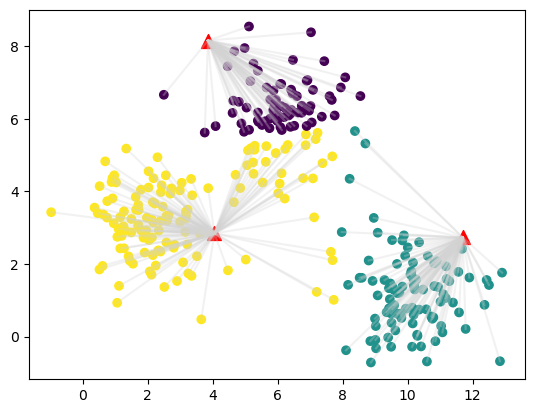

In [16]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
plt.scatter(dataset[:, 0], dataset[:, 1], c=nearest_indexes)

# Plota os centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", c="red", s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index, :]
    for data in dataframe:
        plt.plot(
            [centroid[0], data[0]], [centroid[1], data[1]], c="lightgray", alpha=0.3
        )
plt.show()

In [17]:
centroids = update_centroids(dataset, centroids, nearest_indexes)

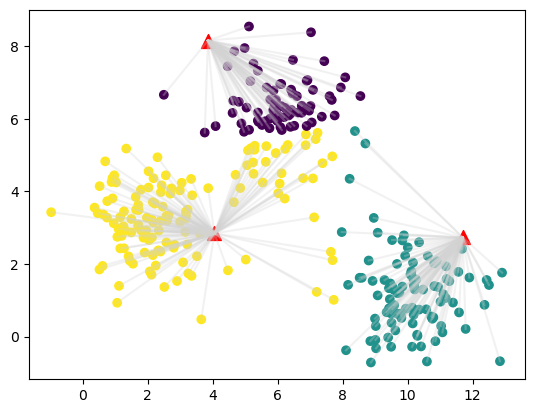

In [18]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
plt.scatter(dataset[:, 0], dataset[:, 1], c=nearest_indexes)

# Plota os centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", c="red", s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index, :]
    for data in dataframe:
        plt.plot(
            [centroid[0], data[0]], [centroid[1], data[1]], c="lightgray", alpha=0.3
        )
plt.show()

Visualize os clusters formados

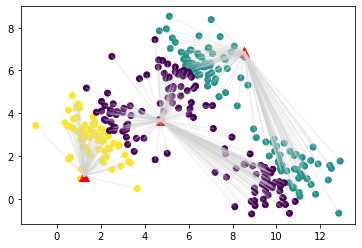

In [ ]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index,:]
    for data in dataframe:
        plt.plot([centroid[0], data[0]], [centroid[1], data[1]], 
                 c='lightgray', alpha=0.3)
plt.show()

Execute a função de atualização e visualize novamente os cluster formados

In [ ]:
centroids = update_centroids(dataset, centroids, nearest_indexes)

# 2. K-means

## 2.1 Algoritmo completo

Utilizando as funções codificadas anteriormente, complete a classe do algoritmo K-means!

In [19]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None

    def fit(self, X):
        self.cluster_centers_ = self.calculate_initial_centers(X, self.n_clusters)
        self.labels_ = self.all_nearest_centroids(X, self.cluster_centers_)

        old_inertia = self.inertia(X, self.cluster_centers_, self.labels_)

        for index in range(self.max_iter):
            self.cluster_centers_ = self.update_centroids(
                X, self.cluster_centers_, self.labels_
            )
            self.labels_ = self.all_nearest_centroids(X, self.cluster_centers_)

            new_inertia = self.inertia(X, self.cluster_centers_, self.labels_)

            if abs(old_inertia - new_inertia) < 1e-4:
                break

            old_inertia = new_inertia

        self.inertia_ = new_inertia
        return self

    def predict(self, X):
        return self.all_nearest_centroids(X, self.cluster_centers_)

    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

    def calculate_initial_centers(self, dataset, k):
        min_values = np.min(dataset, axis=0)
        max_values = np.max(dataset, axis=0)
        centroids = np.random.uniform(
            min_values, max_values, size=(k, dataset.shape[1])
        )

        return centroids

    def euclidean_distance(self, a, b):
        distance = np.linalg.norm(a - b)
        return distance

    def nearest_centroid(self, a, centroids):
        distances = np.linalg.norm(a - centroids, axis=1)
        nearest_index = np.argmin(distances)
        return nearest_index

    def all_nearest_centroids(self, dataset, centroids):
        distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=2)
        nearest_indexes = np.argmin(distances, axis=1)
        return nearest_indexes

    def inertia(self, dataset, centroids, nearest_indexes):
        inertia = np.sum(
            np.linalg.norm(dataset - centroids[nearest_indexes], axis=1) ** 2
        )
        return inertia

    def update_centroids(self, dataset, centroids, nearest_indexes):
        new_centroids = np.empty_like(centroids)
        for i in range(centroids.shape[0]):
            cluster_points = dataset[np.where(nearest_indexes == i)]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = centroids[i]
        return new_centroids

Verifique o resultado do algoritmo abaixo!

Inércia =  608.6035508327782


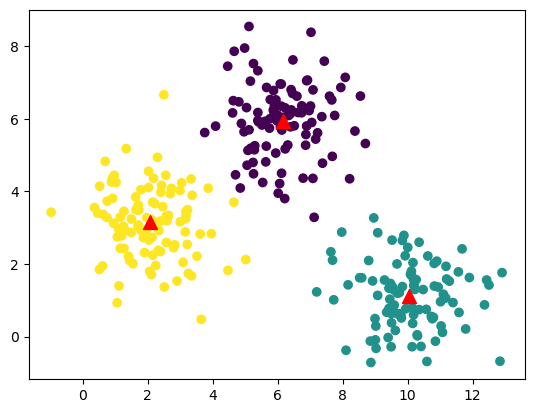

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset[:, 0], dataset[:, 1], c=kmeans.labels_)
for center in kmeans.cluster_centers_:
    plt.scatter(center[0], center[1], marker="^", c="red", s=100)
plt.show()